# Question 17: On which date was the latest fatal kernel error resulting in an rts panic

# Section 1: Data Preparation and Preprocessing

**IMPORTING NECESSARY LIBRARIES**

In [1]:
#https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html
# Importinng 'SparkSession' module which is the main entry point for DataFrame and SQL functionality. SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables and cache tables.
from pyspark.sql import SparkSession

# Importing 'Date (datetime.date)', 'Timestamp (datetime.datetime)' , 'Double' data type from 'Data Types' module  
from pyspark.sql.types import DateType, TimestampType, DoubleType

# importing built-in functions available for DataFrame.
from pyspark.sql.functions import to_date, to_timestamp, col, month

# Importing 'matplotlib.pyplot' module for creating and customizing plots and visualizations. 
# 'pyplot' is a part of the Matplotlib library and provides a user-friendly interface to create different types of plots.
import matplotlib.pyplot as plt

# Importing'time' module for measuring execution time
# https://docs.python.org/3/library/time.html
import time

**EXECUTION TIME COUNTER START**

In [2]:
# Recording the starting time of the execution using the 'time.perf_counter()' function.It provides a high-resolution timer that measures the time elapsed in seconds to measure its execution time.
executiontimestart= time.perf_counter()

In [3]:
# Initializing SparkSession named 'ScpProject' using the SparkSession builder.
session = SparkSession.builder.appName('ScpProject').getOrCreate()

23/08/11 21:37:02 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
# Reading data from CSV file into a DataFrame 'bgl_log_df'
bgl_log_df = session.read.csv("BGLnew.log", sep=',', inferSchema=True, header=False)

In [5]:
# Renaming the columns 'toDF()' method for better understanding into our dataframe.
bgl_log_df = bgl_log_df.toDF('alert_message_flag', 'timestamp', 'date', 'node', 'date_and_time', 'node_repeated',
                             'message_type', 'system_component', 'level', 'message_content')


In [6]:
# Parsing 'date' column to standard DateType
bgl_log_df = bgl_log_df.withColumn('date', to_date('date', 'yyyy.MM.dd'))

In [7]:
# Parsing 'date_and_time' column to standard TimestampType
bgl_log_df = bgl_log_df.withColumn('date_and_time', to_timestamp('date_and_time', 'yyyy-MM-dd-HH.mm.ss.SSSSSS'))

In [8]:
# Casting columns to appropriate data types
bgl_log_df = bgl_log_df.withColumn("timestamp", bgl_log_df["timestamp"].cast(TimestampType())) \
    .withColumn("date", bgl_log_df["date"].cast(DateType())) \
    .withColumn("date_and_time", bgl_log_df["date_and_time"].cast(TimestampType()))

In [9]:
# Using 'printSchema()' method to display the updated schema of the DataFrame 'bgl_log_df'.
bgl_log_df.printSchema()

root
 |-- alert_message_flag: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- date: date (nullable = true)
 |-- node: string (nullable = true)
 |-- date_and_time: timestamp (nullable = true)
 |-- node_repeated: string (nullable = true)
 |-- message_type: string (nullable = true)
 |-- system_component: string (nullable = true)
 |-- level: string (nullable = true)
 |-- message_content: string (nullable = true)



**DATA PREPRATION AND PREPROCESSING COMPLETED**

In [10]:
# We are using the 'show()' method to display the DataFrame 'bgl_log_df' in a vertical format.
# The 'vertical=True' argument is used to display the DataFrame vertically, showing each row in a single line.
# The 'truncate=False' argument is used to prevent truncation of column values, ensuring complete visibility of the data.
bgl_log_df.show(truncate=False, vertical=True)

-RECORD 0------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U11                      
 date_and_time      | 2005-06-03 15:42:50.363779               
 node_repeated      | R02-M1-N0-C:J12-U11                      
 message_type       | RAS                                      
 system_component   | KERNEL                                   
 level              | INFO                                     
 message_content    | instruction cache parity error corrected 
-RECORD 1------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U1

# Section 2: Log Data Analysis : Spark SQL

**TOTAL NUMBER OF LOG ENTRIES IN THE LOG DATASET COUNT**

In [11]:
# Count total logs in the DataFrame
total_logs_count = bgl_log_df.count()

# Display the total number of logs
total_logs_count

4747963

**CREATING TEMPORARY VIEW OF THE DATAFRAME**

In [12]:
# Using the 'createOrReplaceTempView()' method to create a temporary view of the DataFrame 'bgl_log_df'.
# This temporary view, named "bgllogtable," allows us to perform SQL queries and leverage the power of SQL to interact with the DataFrame and perform complex data analysis and transformations.
# NOTE: The temporary view exists for the duration of the SparkSession and can be queried using Spark SQL syntax.
bgl_log_df.createOrReplaceTempView("bgllogtable")

<span style="color:blue">**SQL Query for Question 17: On which date was the latest fatal kernel error resulting in an rts panic**</SPAN>

***1. SELECT date***
   - 1. The SELECT statement retrieves the 'date' column from the 'bgllogtable', representing the dates of the log entries meeting the specified conditions.

***2. FROM bgllogtable***
   - 2. FROM clause to specify the source table 'bgllogtable'.

***3. WHERE level = 'FATAL' AND message_content LIKE '%rts panic%'***
   - 3. The WHERE clause filters the log entries based on two conditions: 'FATAL' log level and the presence of the phrase 'rts panic' in the 'message_content' column.

***5. ORDER BY date_and_time DESC;***
   - 4. The ORDER BY clause is used to sort the results in descending order based on the 'date_and_time' column to display the latest fatal kernel error resulting in an rts panic.

<span style="color:blue">**The output of this SQL query will provide the list of dates in descending order i.e latest fatal kernel error resulting in an rts panic will be displayed first**<span style="color:blue">

In [13]:
SQL_question17="""
SELECT date
FROM bgllogtable
WHERE level = 'FATAL'
  AND message_content LIKE '%rts panic%'
ORDER BY date_and_time DESC;
"""

**LIST OF DATES IN DESCENDING ORDER THAT SHOWS latest fatal kernel error resulting in an rts panic**

In [14]:
# Using the 'session' object to execute an SQL query and display the results.
sql_result_df=session.sql(SQL_question17)
sql_result_df.show()

+----------+
|      date|
+----------+
|2006-01-03|
|2005-12-28|
|2005-12-28|
|2005-12-26|
|2005-12-26|
|2005-12-26|
|2005-12-26|
|2005-12-25|
|2005-12-25|
|2005-12-25|
|2005-12-25|
|2005-12-25|
|2005-12-24|
|2005-12-24|
|2005-12-24|
|2005-12-23|
|2005-12-22|
|2005-12-18|
|2005-12-14|
|2005-12-09|
+----------+
only showing top 20 rows



**TOTAL NUMBER OF FATAL KERNEL ERRORS RESULTING IN AN RTS PANIC**

In [15]:
# printing total number fatal kernel errors resulting in an rts panic count
total_fatal_rts_panic_count=sql_result_df.count()
total_fatal_rts_panic_count

3983

<span style="color:blue">***LATEST DATE OF FATAL KERNEL ERRORS RESULTING IN AN RTS PANIC**<span style="color:blue">

In [16]:
# printing LATEST DATE OF FATAL KERNEL ERRORS RESULTING IN AN RTS PANIC
latest_date_of_fatal_rts_panic=sql_result_df.show(1)

+----------+
|      date|
+----------+
|2006-01-03|
+----------+
only showing top 1 row



In [17]:
#converting the Spark DataFrame to a Pandas DataFrame for plotting
pandas_df = sql_result_df.toPandas()

# Section 3: Visualization

**Pie chart displaying the percentage of fatal kernel errors resulting in an RTS panic compared to the total logs. The <span style="color:blue">BLUE</span> portion of the chart represents the total logs count, and the <span style="color:red">RED</span> portion represents the count of fatal RTS panic errors.**

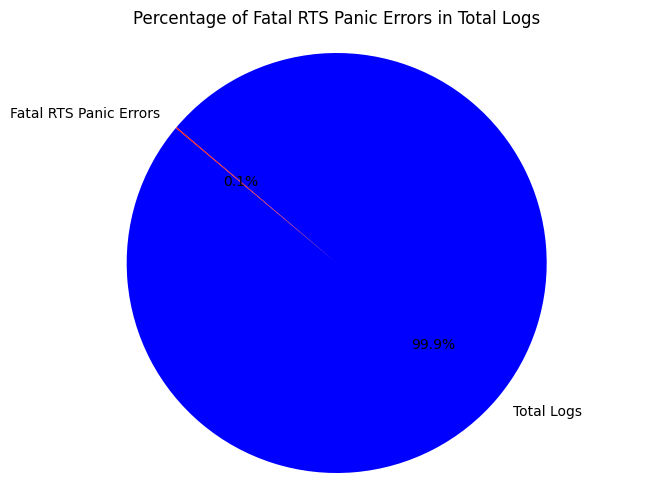

In [18]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# Calculate the percentage of fatal RTS panic errors compared to the total logs
percentage_fatal_rts_panic = (total_fatal_rts_panic_count / total_logs_count) * 100

# Create a pie chart to visualize the data
plt.figure(figsize=(8, 6))
labels = ['Total Logs', 'Fatal RTS Panic Errors']
sizes = [total_logs_count, total_fatal_rts_panic_count]
colors = ['blue', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Percentage of Fatal RTS Panic Errors in Total Logs')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [19]:
# Measuring end of execution time. 
# https://docs.python.org/3/library/time.html
# returns the value (in fractional seconds) of a performance counter.It does include time elapsed during sleep and is system-wide.
executiontimeend= time.perf_counter()

In [20]:
# Calculating the total execution time by subtracting the start time from the end time.
# Calculating the total execution time as  time.perf_counter() returns the absolute value of the counter
# https://stackoverflow.com/questions/25785243/understanding-time-perf-counter-and-time-process-time
totalexecution_time= executiontimeend - executiontimestart
totalexecution_time

10.936526488003437

In [21]:
# all the information on the 'spark runtime environment', executors sumamry, jobs and its stages can be found on 'Spark UI'
spark